# Object Detection - Quick Start

:label:`sec_object_detection_quick`


Besides Image classification, objecgt detection is another important task in computer vision. In this tutorial, we will share a brief example to go through steps that how to use AutoGluon for object detection.

Our goal is to detect motorbike in images by YOLO3 model. A tiny dataset is collected from VOC dataset, which only contains motorbike category. The model that is pretained on COCO dataset is used to do finetuning on our small dataset. With the help of AutoGluon, we are able to try many models with different hyper-parameters automatically, and return the best one as our final model. It is better to go over the tutorial about :ref:`sec_imgquick` first to learn how to use AutoGluon.

Let's start with importing autogluon and ObjectDetection module for our task

In [5]:
import autogluon as ag
from autogluon import ObjectDetection as task

## Tiny_motorbike dataset
We collect a toy dataset only for detecting motorbikes in images. From VOC datset, 120 images are randomly selected as our training dataset, 50 images for validation and another 50 ones for testing. This tiny dataset follows the same format as VOC. 

We can download this dataset, which is only 23M, by commands below. The variable `root` specifies the path to store this dataset. The name of unzipped folder is called `tiny_motorbike`.

In [6]:
import os
root = './'
filename = ag.download('https://autogluon.s3.amazonaws.com/datasets/tiny_motorbike.zip',
                        path=root)
ag.unzip(filename, root=root)

Once we retrieve the dataset, we can create dataset instacne with its name and path.

In [7]:
dataset = task.Dataset("tiny_motorbike", root=os.path.join(root, "tiny_motorbike"))

>>> create dataset: tiny motorbike


## Fit models by AutoGluon
In this section, we will talk about how to apply AutoGluon to fit our detetion models. We use mobilenet as backbone for YOLO3 model. Two different learning rates will be used to finetune the network. The best model is the one that obtains the best performance on validation dataset. We can also try more networks and hyper-parameters to have a largar searching space. 

In order to have results after you grab a cup of coffee, time_limits is set to 15mins for this task. In each experiment (one trial in our searching space), we train the model for 30 epoches. Let's start playing around AutoGluon.

In [9]:
detector = task.fit(dataset,
                    epochs=30,
                    ngpus_per_trial=1)

INFO:root:{'dataset': <autogluon.task.object_detection.dataset.voc.TinyVOC object at 0x7f7f205c9dd0>, 'net': 'mobilenet1.0', 'lr': 0.0005, 'loss': SoftmaxCrossEntropyLoss(batch_axis=0, w=None), 'num_gpus': 1, 'batch_size': 16, 'epochs': 30, 'num_workers': 8, 'hybridize': True, 'final_fit': False, 'seed': 223, 'data_shape': 416, 'start_epoch': 0, 'lr_mode': 'step', 'lr_decay': 0.1, 'lr_decay_period': 0, 'lr_decay_epoch': '160,180', 'warmup_lr': 0.0, 'warmup_epochs': 2, 'momentum': 0.9, 'wd': 0.0005, 'log_interval': 100, 'save_prefix': 'yolo3_mobilenet1.0_custom', 'save_interval': 10, 'val_interval': 1, 'num_samples': -1, 'no_random_shape': False, 'no_wd': False, 'mixup': False, 'no_mixup_epochs': 20, 'label_smooth': False, 'resume': False, 'syncbn': False, 'task_id': 0}


INFO:root:{'dataset': <autogluon.task.object_detection.dataset.voc.TinyVOC object at 0x7f7f2025e110>, 'net': 'mobilenet1.0', 'lr': 0.0001, 'loss': SoftmaxCrossEntropyLoss(batch_axis=0, w=None), 'num_gpus': 1, 'batch_size': 16, 'epochs': 30, 'num_workers': 8, 'hybridize': True, 'final_fit': False, 'seed': 223, 'data_shape': 416, 'start_epoch': 0, 'lr_mode': 'step', 'lr_decay': 0.1, 'lr_decay_period': 0, 'lr_decay_epoch': '160,180', 'warmup_lr': 0.0, 'warmup_epochs': 2, 'momentum': 0.9, 'wd': 0.0005, 'log_interval': 100, 'save_prefix': 'yolo3_mobilenet1.0_custom', 'save_interval': 10, 'val_interval': 1, 'num_samples': -1, 'no_random_shape': False, 'no_wd': False, 'mixup': False, 'no_mixup_epochs': 20, 'label_smooth': False, 'resume': False, 'syncbn': False, 'task_id': 1}


INFO:root:{'dataset': <autogluon.task.object_detection.dataset.voc.TinyVOC object at 0x7f7f20276210>, 'net': 'mobilenet1.0', 'lr': 0.0001, 'loss': SoftmaxCrossEntropyLoss(batch_axis=0, w=None), 'num_gpus': 1, 'batch_size': 16, 'epochs': 30, 'num_workers': 8, 'hybridize': True, 'final_fit': True, 'seed': 223, 'data_shape': 416, 'start_epoch': 0, 'lr_mode': 'step', 'lr_decay': 0.1, 'lr_decay_period': 0, 'lr_decay_epoch': '160,180', 'warmup_lr': 0.0, 'warmup_epochs': 2, 'momentum': 0.9, 'wd': 0.0005, 'log_interval': 100, 'save_prefix': 'yolo3_mobilenet1.0_custom', 'save_interval': 10, 'val_interval': 1, 'num_samples': -1, 'no_random_shape': False, 'no_wd': False, 'mixup': False, 'no_mixup_epochs': 20, 'label_smooth': False, 'resume': False, 'syncbn': False, 'task_id': 2}



The best config:
 {'lr.choice': 1, 'net.choice': 0}


After fitting, AutoGluon will automatically return the best model among all models in searching space. From output, we know the best model is the one trained with the second learning rate. Now, let's see how well the returned model perform on test dataset by simply calling detector.evaluate().

In [10]:
test_acc = detector.evaluate(dataset) # it only evaluates on test dataset.
print("mAP on test dataset: {}".format(test_acc[1][1]))

mAP on test dataset: 0.8372488934286689


The mAP is not bad after just 30 epochs. Let's see one visualization result. We randomly select an image from test dataset, and show predicted bbox and probability over the origin image.

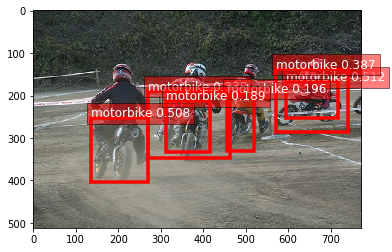

In [11]:
image = '000467.jpg'
image_path = os.path.join(root, 'tiny_motorbike/VOC2007/JPEGImages', image)

ind, prob, loc = detector.predict(image_path)

We have tried models with various settings. Finally, showdown the whole processs via following command.

In [12]:
ag.done()